<a href="https://colab.research.google.com/github/SHANJAY975/CODSOFT/blob/main/Sales_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Price Prediction

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Importing the Dataset

In [ ]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Exploring the Dataset

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


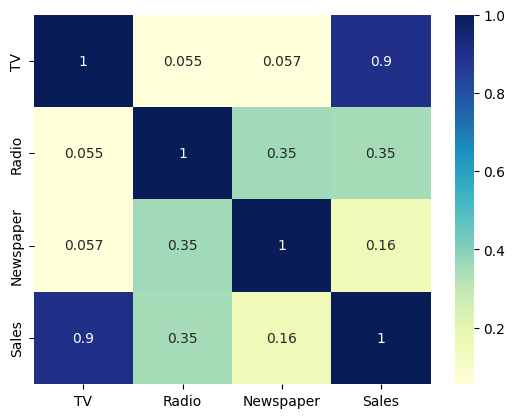

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

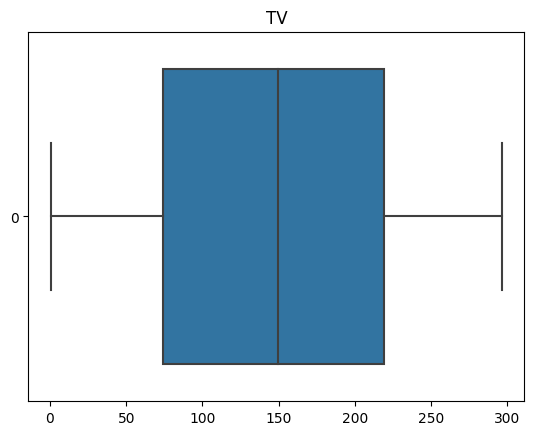

In [ ]:
sns.boxplot(df['TV'],orient='h')
plt.title('TV')
plt.show()

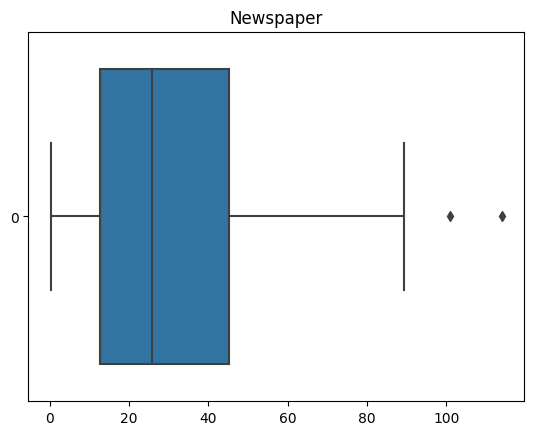

In [ ]:
sns.boxplot(df['Newspaper'],orient='h')
plt.title('Newspaper')
plt.show()

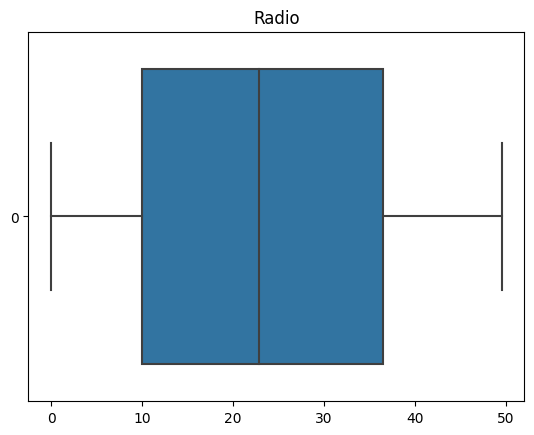

In [ ]:
sns.boxplot(df['Radio'],orient='h')
plt.title('Radio')
plt.show()

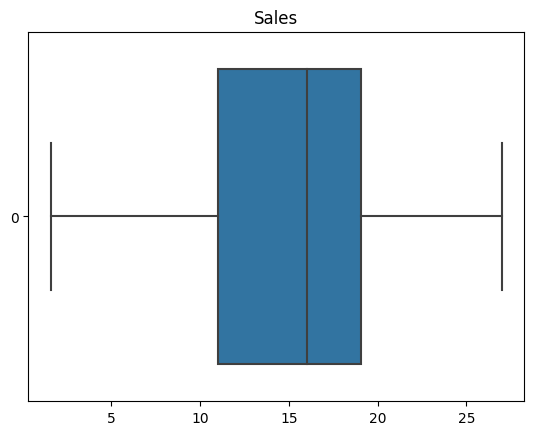

In [ ]:
sns.boxplot(df['Sales'],orient='h')
plt.title('Sales')
plt.show()

# Data PreProcessing

In [ ]:
n_columns = df.shape[1]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = []
for i in range(n_columns-1):
    sc.append(StandardScaler())
    df.iloc[:,i] = sc[-1].fit_transform(np.array(df.iloc[:,i]).reshape(-1,1))

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,7.6
196,-0.617035,-1.240003,-1.033598,14.0
197,0.349810,-0.942899,-1.111852,14.8
198,1.594565,1.265121,1.640850,25.5


# Splitting the Dataset

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 1/3)

In [ ]:
X_train[:5,:]

array([[ 0.73047627, -0.17988276, -0.91391563],
       [-0.10675585,  1.56222509,  1.30942097],
       [ 0.24938891, -1.09145083, -0.81724882],
       [-0.14879261, -1.24000266, -0.97836017],
       [ 0.34981006,  0.68441881,  0.37497515]])

In [ ]:
X_test[:5,:]

array([[ 0.28325186,  1.10981724,  0.32894334],
       [-0.3986778 , -0.39595816,  0.37037197],
       [-0.82488383,  0.23201095, -0.37994659],
       [ 0.19217221,  0.91399891, -1.06582061],
       [-1.4390876 ,  0.79920886,  1.62704048]])

# Training and Predicting

LinearRegression

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [ ]:
model1_prediction = model1.predict(X_test)

In [ ]:
model1_prediction = model1_prediction.round(decimals = 1)

In [ ]:
model1_prediction

array([18.3, 12.6, 11.6, 17.6,  9.5, 21.4, 13.3, 13.8, 13.1,  7.1,  6.9,
        9.1, 10. , 18.2, 21.5, 19.4, 21.2, 13.9, 17.8,  7. , 21.2, 16.5,
       22.7,  6.2,  9.4,  8. , 13.7,  9.6, 11.8, 20.8, 17.2,  9. ,  5.3,
       15.8,  9.6, 10.6, 14.3, 12.4, 15.9, 22.2, 17.3, 15.8, 12.3, 18.2,
       19. , 11. ,  7.8,  9.4, 17.1, 20.6, 18.3, 17.7,  8.8, 14.9, 10.8,
        9.7,  7.7, 16.4, 13.9, 20.1, 21.1, 15.3,  9.5, 18.6, 13.4, 21.4,
       12. ])

In [ ]:
y_test

array([16. , 11.9, 11.8, 18. ,  9.2, 17.4, 13.2, 12.9, 13.3,  7.2,  5.6,
        7.3, 11.9, 17.5, 23.8, 18.4, 21.5, 14.6, 18.4,  7.6, 22.1, 17.2,
       20.8,  7.3, 11.3,  5.7, 12.2,  8.8, 11. , 22.6, 16.6, 11.9,  5.3,
       16.7,  8. , 10.8, 14.2, 12.6, 16.4, 22.2, 16.5, 17.5, 11.6, 17.3,
       20.5, 10.9,  7. ,  9.7, 20.2, 19.7, 19.6, 16.9,  9.4, 16. , 11.3,
        9.6,  8.1, 16. , 14.7, 16.8, 17.8, 15.9, 12. , 18.2, 14. , 20. ,
       12.5])

In [ ]:
model2 = SVR()

param_grid = {'C': [0.1 , 1 , 10, 20 , 50 , 75, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)


print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy on Testing Data:", accuracy)

Best Hyperparameters: {'C': 100, 'kernel': 'rbf'}
Best Score: 0.8761585232147994
Accuracy on Testing Data: 0.9367691148321932


# Evaluation of model 1

Mean Squared Error

In [ ]:
MSE = mean_squared_error(y_test, model1_prediction)

In [ ]:
MSE

1.9150746268656718

Root Mean Squared Error

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

1.383862213829712

In [ ]:
r_squared = r2_score(y_test, model1_prediction)
r_squared

0.9137855888410275

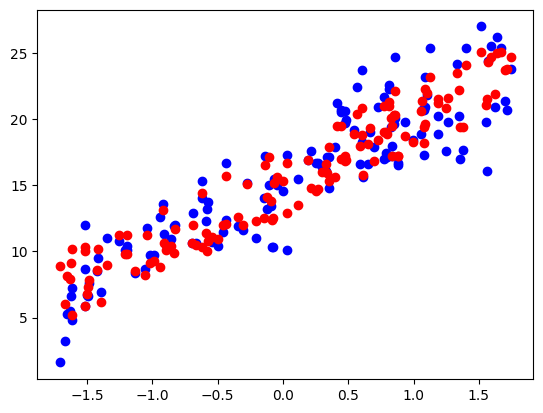

In [ ]:
plt.scatter(X_train[:,0],y_train, c='b')
plt.scatter(X_train[:,0], model1.predict(X_train).round(decimals = 1), c='r')
plt.show()